# Task – 1: Implement a perceptron learning algorithm
Implement the perceptron in Python using the following algorithm. Write a function for the perceptron. The function arguments should be the dataset and learning rate.
•Apply the following algorithm to update the weights.
•plot the decision line after each iteration do show the results
•Show the final weights when the algorithm converges.

Final Weights:  0.6759076945287846 and 0.666640579785124


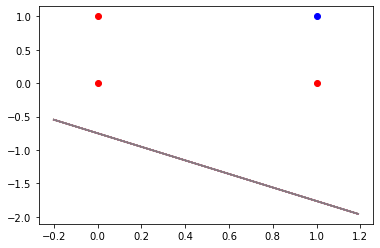

In [1]:
#write your codes and discuss here...
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


dataset = np.array([[1,1,1],
                   [1,0,1],
                   [0,1,1],
                   [0,0,0]])

learning_rate = 0.5

weight_list = []
product_list = []

def update_weights(w,n,y1,y2,x):
    return w+(n*(y1-y2)*x)

def compute_result(w,x,b):
    return (np.dot(np.transpose(w),x) + b)

def perceptron(dataset,learning_rate):
    weights = np.array([random.random(),random.random()])
    bias = 0.5
    true_y = np.array_split(dataset,[2],axis = 1)[1].tolist()
    input_x = np.array_split(dataset,[2],axis = 1)[0]
    output_y = []
    while true_y != output_y:
        output_y = []
        for itr in range(0,len(input_x)):
            product = compute_result(weights,input_x[itr],bias)
            y = 1 if product > 1 else 0
            output_y.append([y])
            weights = update_weights(weights,learning_rate,true_y[itr][0],y,input_x[itr]) if y != true_y[itr] else weights
            weight_list.append(weights)
            product_list.append(product)
    return weights

final_weights = perceptron(dataset,learning_rate)

#Plots
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
bias = 0.5
X = np.arange(xmin, xmax, 0.01)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="b")
for val in range(0,len(weight_list)):
    m = -weight_list[val][0] / weight_list[val][1]
    c = -bias / weight_list[val][1]
    plt.plot(X,m * X + c)
    plt.plot()

print('Final Weights: ',final_weights[0],'and',final_weights[1])

# Task – 2
Extend Task 1 so that the perceptron can be applied as
1.AND Gate.
2.OR gate.
•Use the truth table of these gates as patterns and the output of the gates as the desired output. 
•Plot the positions of these four points on a graph with suitable scale in the x and the y axes.
•Plot the line of separability between the points in each stage of the implementation.

Final Weights_and:  0.6490501546656607 and 0.9588089063744476
Final Weights_OR:  0.9060979017051028 and 0.7016161487103262


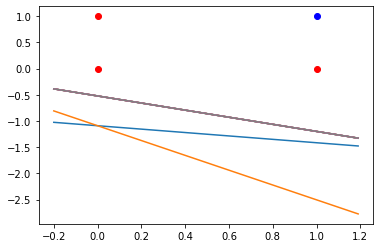

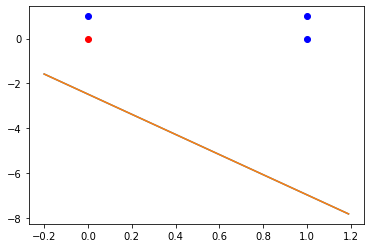

In [2]:
#write your codes and discuss here...

#Dataset AND

dataset_and = np.array([[1,1,1],
                   [1,0,1],
                   [0,1,1],
                   [0,0,0]])

weight_list = []
product_list = []
final_weights_and = perceptron(dataset,learning_rate)

#Plots
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
bias = 0.5
X = np.arange(xmin, xmax, 0.01)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="b")
for val in range(0,len(weight_list)):
    m = -weight_list[val][0] / weight_list[val][1]
    c = -bias / weight_list[val][1]
    plt.plot(X,m * X + c)
    plt.plot()
print('Final Weights_and: ',final_weights_and[0],'and',final_weights_and[1])

#Dataset OR
dataset = np.array([[1,1,1],
                   [1,0,1],
                   [0,1,1],
                   [0,0,0]])
weight_list = []
product_list = []

final_weights_or = perceptron(dataset,learning_rate)

#Plots
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
bias = 0.5
X = np.arange(xmin, xmax, 0.01)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="b")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="b")
for val in range(0,len(final_weights_or)):
    m = -weight_list[val][0] / weight_list[val][1]
    c = -bias / weight_list[val][1]
    plt.plot(X,m * X + c)
    plt.plot()

print('Final Weights_OR: ',final_weights_or[0],'and',final_weights_or[1])


# Task – 3
The perceptron will be used in this task to classify the IRIS dataset into two classes. Notice that the dataset contains 150 instances (samples) with 3 classes. You can choose two of three class for this task.
•Write a function to access the IRIS dataset from the link below and convert it into a suitable format that can be dealt with by the perceptron.  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 

This can be achieved by converting the text in the dataset into numbers that represent the different class numbers. 
•Train the perceptron in Task 1 to classify the two classes.
•Your code should show the line of separability between the two classes.

-1.1274704121508201 -0.62256461820134
Final Weights_iris:  0.9055047292987917 and 0.8031294830800967


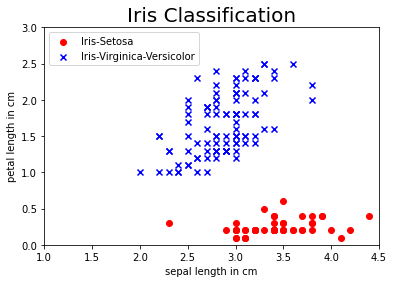

In [3]:
#write your codes and discuss here...

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

X = df.iloc[:150, [1,3,4]].values
dataset_iris = np.where(X == 'Iris-setosa', 0, 1)
dataset_iris

weight_list = []
product_list = []

final_weights_iris = perceptron(dataset,learning_rate)


fig, ax = plt.subplots()
xmin, xmax = 1, 4.5
plt.title('Iris Classification', fontsize=20)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Iris-Setosa')
plt.scatter(X[50:150, 0], X[50:150, 1], color='blue', marker='x', label='Iris-Virginica-Versicolor')
plt.xlabel('sepal length in cm')
plt.ylabel('petal length in cm')
plt.legend(loc='upper left')
m = -weight_list[val][0] / weight_list[val][1]
c = -bias / weight_list[val][1]
ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 3])
print(m, c)
#ax.plot(X, m * X +c)
plt.plot()

print('Final Weights_iris: ',final_weights_iris[0],'and',final_weights_iris[1])

# Task – 4
Report and document the steps you followed to achieve the tasks above.
Discuss your result and suggest a way to improve it.


In [4]:
#write your codes and discuss here...